In [1]:
import keras
from keras import layers
import numpy as np
import random
import io
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
import tensorflow as tf

In [11]:
########## PARAMETERS ###############

seq_length = 11
EON = '~'
input_letter = 'x'

#####################################

In [3]:
########## PRE-PROCESSING ##############

with open('names.txt', 'r') as names:
    lines = [line.rstrip('\n') for line in names]
    new_names = open("new_names.txt", "w")
    for line in lines:
        new_line = line.lower()
        while len(new_line) < seq_length:
            new_line += EON
        new_names.write(f"{new_line}\n")
names.close()
new_names.close()

##########################################

In [4]:
with io.open("new_names.txt", "r") as f:
    text = f.read().lower()
text = text.replace("\n", "")
print("Total length:", len(text))

chars = sorted(list(set(text)))
chars = chars[-1:] + chars[:-1]
print("Total chars:", len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

maxlen = seq_length
names = []
for i in range(0, len(text), maxlen):
    names.append(text[i : i + maxlen])
print("Number of sequences:", len(names))

x = np.zeros((len(names), maxlen, len(chars)), dtype=np.int)
y = np.zeros((len(names), maxlen, len(chars)), dtype=np.int)
eon = np.zeros((len(chars)))
eon[0] = 1
for i, name in enumerate(names):
    for t, char in enumerate(name):
        x[i, t, char_indices[char]] = 1
    y[i][:-1] = x[i][1:]
    y[i][-1] = eon

Total length: 22000
Total chars: 27
Number of sequences: 2000


In [5]:
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars)), return_sequences=True))
model.add(Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
filepath = "model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
desired_callbacks = [checkpoint]

In [ ]:
# for i in range(epochs):
history = model.fit(x, y, epochs=100, validation_split=0.15, batch_size=128, callbacks=desired_callbacks)

In [8]:
model.save('my_model.hdf5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


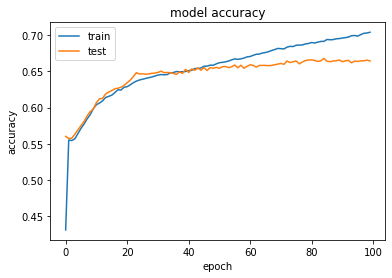

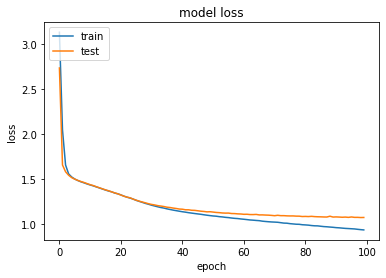

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
names_list = []
while len(names_list) < 20:
    sequence = input_letter
    x_pred = np.zeros((1, maxlen, len(chars)))
    for i in range(maxlen):
        for t, char in enumerate(sequence):
            x_pred[0, t, char_indices[char]] = 1.0
        preds = model.predict(x_pred, verbose=0)
        indices = np.argsort(-1*preds[0][i])[:3]
        if 0 in indices:
            sequence += EON
        else:
            sequence += indices_char[random.choice(indices)]
    if sequence not in names_list:
        names_list.append(sequence)

for name in names_list:
    for char in name:
        if char == '~':
            index = name.index(char)
            neat = name[:index]
    print(neat.title())

Xon
Xolia
Xila
Xan
Xis
Xin
Xally
Xallie
Xale
Xalia
Xola
Xilla
Xor
Xar
Xalin
Xallee
Xile
Xole
Xolin
Xillia
